<a href="https://colab.research.google.com/github/irunwazed/ai-projects/blob/main/CNN_pengenalan_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PENGENALAN GAMBAR

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.14.0'

In [16]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [17]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

label : Shirt
Image Pixel Array : 
[[  0   0   0   0   0   0   0   0   1   0   0  37 192 177 171 199  27   0   0   0   1   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0 135 230 162 155 253 164  14   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0  64 152 232 207 195 155 157 201 227 224 221 172  94   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 112 179 205 199 192 197 216 194 192 220 210 192 191 203 207 208  62   0   1   0   0   0]
 [  0   0   0   0   0  75 208 186 178 185 172 197 213 195 200 208 199 188 187 181 180 204 192   0   0   0   0   0]
 [  0   0   0   0   0 180 190 179 185 182 184 178 166 193 185 167 187 186 184 184 192 192 223  28   0   0   0   0]
 [  0   0   0   0   0 205 190 182 182 185 182 185 181 182 180 180 185 186 182 184 201 195 219  72   0   0   0   0]
 [  0   0   0   0   0 210 186 194 181 181 182 178 180 184 182 177 179 185 184 194 211 188 218  95   0   0   0   0]
 [  0   0   0   0   0 217 179 193 193 175 175

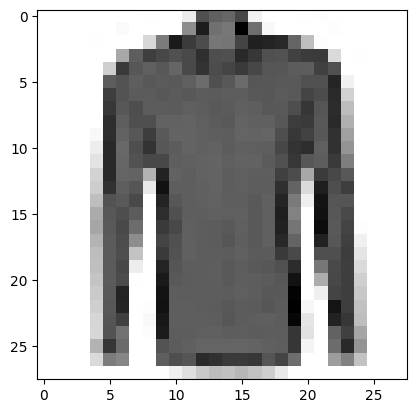

In [21]:
# dapat menggati 0 - 59999
index = 40

np.set_printoptions(linewidth=320)

print(f'label : {labels[training_labels[index]]}')
print(f'Image Pixel Array : \n{training_images[index]}')


# visual image
plt.imshow(training_images[index], cmap='Greys')



In [ ]:
# normalisasi
training_images = training_images / 255.0
test_images = test_images / 255.0

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer = tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.7000 - accuracy: 0.7077
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6424 - accuracy: 0.7743
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5854 - accuracy: 0.7887
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5492 - accuracy: 0.7999
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5125 - accuracy: 0.8224


In [23]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6489 - accuracy: 0.7870


[0.6488854289054871, 0.7870000004768372]

1/1 [==============================] - 0s 90ms/step


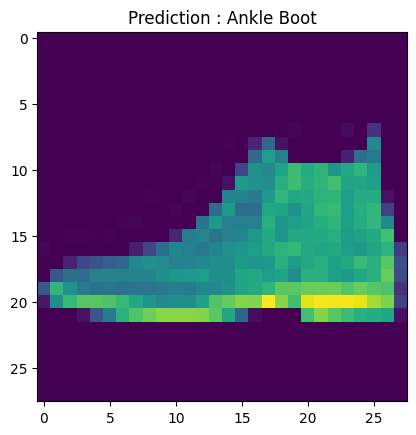

In [24]:
# load the image of the cat
img = test_images[0]
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# make prediction using the pre trained model
predictions = model.predict(img_array)

# plot the image and prediction
plt.imshow(img)
plt.title("Prediction : %s" % (labels[np.argmax(predictions)]))
plt.show()